In [ ]:
!pip install catboost
!pip install category_encoders


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from category_encoders import TargetEncoder


In [ ]:
data = pd.read_csv("./drive/MyDrive/gladiator_data.csv")
data

,Name,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,...,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques,Survived
0,Cosconius Hostius,42,8,Gaul,176,54,Hoplomachus,10,2,Novice,...,12,Stoic,Good,Glory,Laborer,Medium,Balanced,Low,Flamboyant,True
1,Caecilius Valerius,30,20,Greece,173,67,Provocator,6,0,Agility,...,6,Aggressive,Excellent,Freedom,Laborer,Medium,Aggressive,High,Intimidating,False
2,Sempronius Aulus,30,20,Gaul,171,81,Hoplomachus,8,4,Endurance,...,12,Calculative,Excellent,Wealth,Unemployed,Medium,Balanced,Medium,Charismatic,True
3,Lacerius Laberius,32,18,Rome,172,72,Retiarius,8,3,Novice,...,11,Stoic,Excellent,Freedom,Unemployed,Medium,Aggressive,High,Humble,True
4,Blaesus Modius,29,21,Gaul,177,87,Secutor,12,5,Tactics,...,17,Stoic,Good,Survival,Entertainer,Medium,Balanced,Medium,Humble,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737565,Orestius Maecenas,45,354,Germania,167,92,Provocator,11,1,Novice,...,12,Stoic,Good,Freedom,Criminal,Medium,Balanced,Medium,Humble,False
737566,Sempronius Fannius,40,359,Rome,176,76,Retiarius,9,2,Novice,...,11,Aggressive,Excellent,Glory,Criminal,Medium,Balanced,Medium,Intimidating,False
737567,Laberius Gracchus,28,371,Germania,176,108,Secutor,5,2,Novice,...,7,Calculative,Excellent,Freedom,Laborer,Medium,Balanced,Medium,Charismatic,False
737568,Matinius Percennius,32,367,Rome,186,79,Thraex,7,0,Strength,...,7,Stoic,Excellent,Glory,Unemployed,Medium,Balanced,High,Flamboyant,True


# Задание 1

In [ ]:
class_counts = data['Survived'].value_counts()
print("Class counts: \n", class_counts)
total_len = len(data['Survived'])

distribution = class_counts / total_len * 100

print("Class distribution: \n", distribution)

Class counts: 
 True     370081
False    367489
Name: Survived, dtype: int64
Class distribution: 
 True     50.175712
False    49.824288
Name: Survived, dtype: float64


In [ ]:
data_unbalance = data.copy()

indices_to_remove = data_unbalance[data_unbalance['Survived']==True].sample(frac=0.85).index

data_unbalance = data_unbalance.drop(indices_to_remove)

class_counts = data_unbalance['Survived'].value_counts()
print("Class counts: \n", class_counts)
total_len = len(data_unbalance['Survived'])

distribution = class_counts / total_len * 100

print("Class distribution: \n", distribution)

Class counts: 
 False    367489
True      55512
Name: Survived, dtype: int64
Class distribution: 
 False    86.876627
True     13.123373
Name: Survived, dtype: float64


In [ ]:
category_columns = data_unbalance.select_dtypes(include=['object'])
category_columns.columns

Index(['Name', 'Origin', 'Category', 'Special Skills', 'Weapon of Choice',
       'Patron Wealth', 'Equipment Quality', 'Injury History',
       'Diet and Nutrition', 'Tactical Knowledge', 'Allegiance Network',
       'Psychological Profile', 'Health Status', 'Personal Motivation',
       'Previous Occupation', 'Training Intensity', 'Battle Strategy',
       'Social Standing', 'Crowd Appeal Techniques'],
      dtype='object')

In [ ]:
data_unbalance['Survived'] = data_unbalance['Survived'].replace({True:1, False:0})

X = data_unbalance.iloc[:, :28]
y = data_unbalance.iloc[:, 28]

label_encoder = LabelEncoder()

for column in category_columns.columns:
  X[column] = label_encoder.fit_transform(X[column])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = CatBoostClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Learning rate set to 0.12388
0:	learn: 0.5607341	total: 98.3ms	remaining: 1m 38s
1:	learn: 0.4667670	total: 190ms	remaining: 1m 35s
2:	learn: 0.4086970	total: 283ms	remaining: 1m 33s
3:	learn: 0.3674560	total: 375ms	remaining: 1m 33s
4:	learn: 0.3366171	total: 486ms	remaining: 1m 36s
5:	learn: 0.3151305	total: 570ms	remaining: 1m 34s
6:	learn: 0.2964917	total: 669ms	remaining: 1m 34s
7:	learn: 0.2840215	total: 761ms	remaining: 1m 34s
8:	learn: 0.2756912	total: 848ms	remaining: 1m 33s
9:	learn: 0.2671231	total: 938ms	remaining: 1m 32s
10:	learn: 0.2597602	total: 1.03s	remaining: 1m 32s
11:	learn: 0.2557308	total: 1.11s	remaining: 1m 31s
12:	learn: 0.2520422	total: 1.21s	remaining: 1m 31s
13:	learn: 0.2481426	total: 1.3s	remaining: 1m 31s
14:	learn: 0.2450969	total: 1.38s	remaining: 1m 30s
15:	learn: 0.2424037	total: 1.48s	remaining: 1m 31s
16:	learn: 0.2406172	total: 1.57s	remaining: 1m 30s
17:	learn: 0.2387737	total: 1.66s	remaining: 1m 30s
18:	learn: 0.2369937	total: 1.75s	remaining: 

# Задание 2

Precision

In [ ]:
true_positive = np.sum((y_pred == 1) & (y_test == 1))

false_positive = np.sum((y_pred == 1) & (y_test == 0))

precision = true_positive / (true_positive + false_positive)
precision

0.704777307788007

In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
precision

0.704777307788007

Recall

In [ ]:
true_positive = np.sum((y_pred == 1) & (y_test == 1))

false_negative = np.sum((y_pred == 0) & (y_test == 1))

recall = true_positive / (true_positive + false_negative)
recall

0.5075255330585916

In [ ]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
recall

0.5075255330585916

Specificity

In [ ]:
true_negative = np.sum((y_pred == 0) & (y_test == 0))

false_positive = np.sum((y_pred == 1) & (y_test == 0))

specificity = true_negative / (true_negative + false_positive)
specificity

0.9676874685112815

In [ ]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, y_pred)

specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1])
specificity

0.9676874685112815

F1-score

In [ ]:
f1_score = 2 * ((precision * recall) / (precision + recall))
f1_score

0.5901041666666667

In [ ]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
f1

0.5901041666666667

# Задание 3

In [ ]:
y_scores = model.predict_proba(X_test)[:, 1]

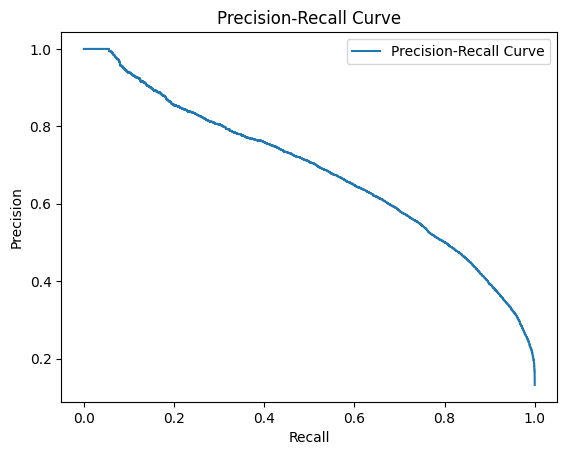

In [ ]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

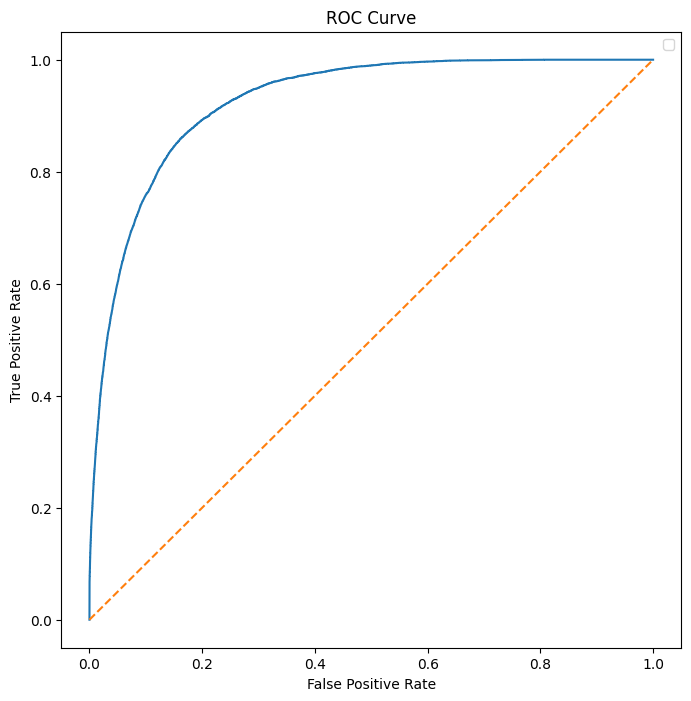

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import auc

roc_auc = auc(fpr, tpr)
auc_pr = auc(recall, precision)
print("AUC-PR: ", auc_pr)
print("ROC-AUC: ", roc_auc)

AUC-PR:  0.6831266639483902
ROC-AUC:  0.9256979561068469


# Задание 4

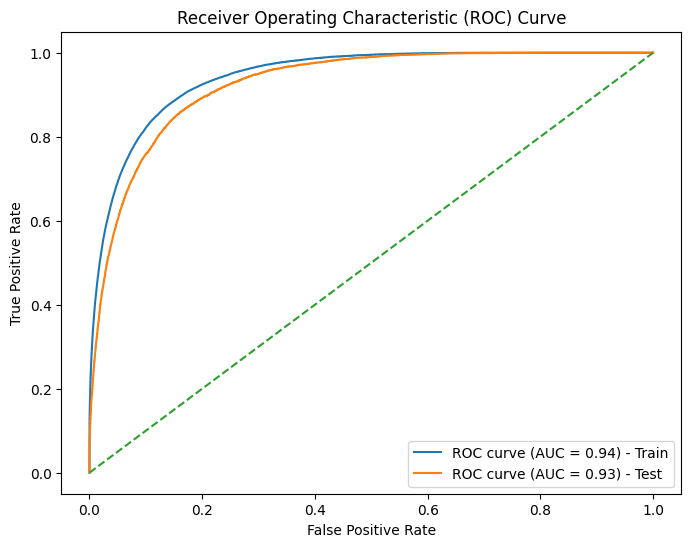

In [ ]:
y_scores_train = model.predict_proba(X_train)[:, 1]
y_scores_test = model.predict_proba(X_test)[:, 1]

fpr_test, tpr_test, _ = roc_curve(y_test, y_scores_test)
roc_auc_test = auc(fpr_test, tpr_test)

fpr_train, tpr_train, _ = roc_curve(y_train, y_scores_train)
roc_auc_train = auc(fpr_train, tpr_train)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label='ROC curve (AUC = {:.2f}) - Train'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, label='ROC curve (AUC = {:.2f}) - Test'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Выходные данные были обрезаны до нескольких последних строк (5000).
4:	learn: 0.3362918	total: 486ms	remaining: 1m 36s
5:	learn: 0.3130431	total: 586ms	remaining: 1m 37s
6:	learn: 0.2951495	total: 681ms	remaining: 1m 36s
7:	learn: 0.2815525	total: 771ms	remaining: 1m 35s
8:	learn: 0.2736654	total: 867ms	remaining: 1m 35s
9:	learn: 0.2669351	total: 953ms	remaining: 1m 34s
10:	learn: 0.2613985	total: 1.05s	remaining: 1m 34s
11:	learn: 0.2553478	total: 1.13s	remaining: 1m 33s
12:	learn: 0.2508141	total: 1.22s	remaining: 1m 32s
13:	learn: 0.2473649	total: 1.32s	remaining: 1m 32s
14:	learn: 0.2446607	total: 1.4s	remaining: 1m 31s
15:	learn: 0.2421365	total: 1.48s	remaining: 1m 30s
16:	learn: 0.2404530	total: 1.57s	remaining: 1m 30s
17:	learn: 0.2389132	total: 1.67s	remaining: 1m 30s
18:	learn: 0.2372030	total: 1.75s	remaining: 1m 30s
19:	learn: 0.2361908	total: 1.83s	remaining: 1m 29s
20:	learn: 0.2347731	total: 1.92s	remaining: 1m 29s
21:	learn: 0.2334638	total: 2.02s	remaining: 1m 29s
22:

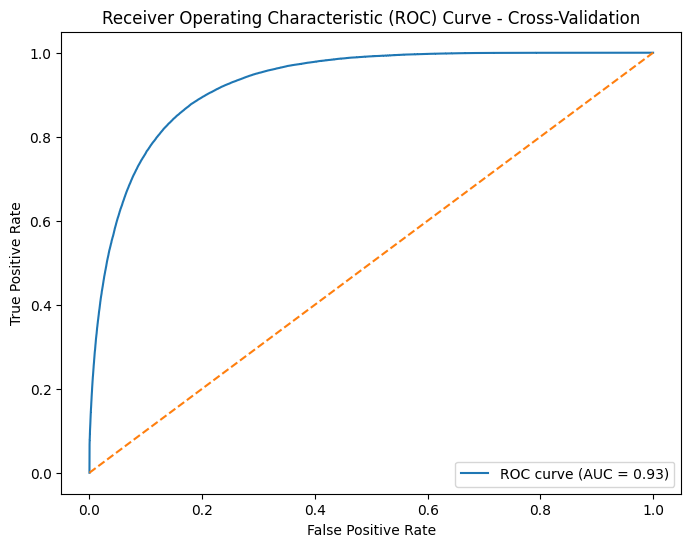

In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

y_scores = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

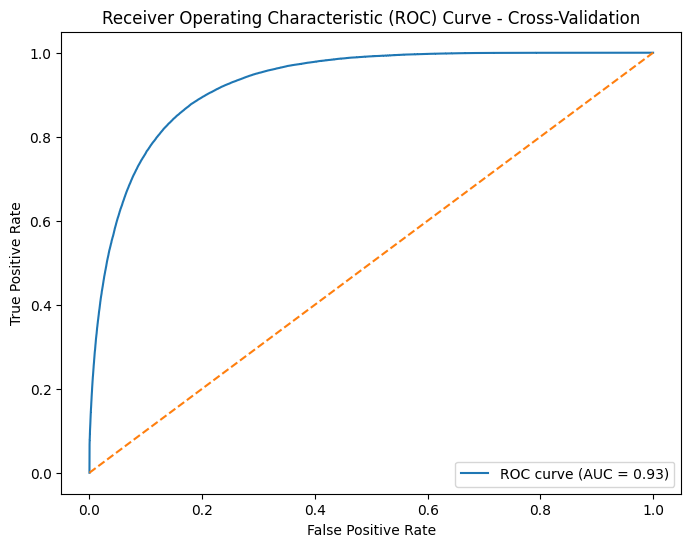

In [ ]:
fpr, tpr, thresholds = roc_curve(y, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Cross-Validation')
plt.legend(loc='lower right')
plt.show()

# Задание 5

Criterion - LogLoss

In [ ]:
model = CatBoostClassifier(loss_function='Logloss')
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:, 1]


Learning rate set to 0.12388
0:	learn: 0.5607341	total: 97.3ms	remaining: 1m 37s
1:	learn: 0.4667670	total: 195ms	remaining: 1m 37s
2:	learn: 0.4086970	total: 287ms	remaining: 1m 35s
3:	learn: 0.3674560	total: 386ms	remaining: 1m 36s
4:	learn: 0.3366171	total: 481ms	remaining: 1m 35s
5:	learn: 0.3151305	total: 572ms	remaining: 1m 34s
6:	learn: 0.2964917	total: 678ms	remaining: 1m 36s
7:	learn: 0.2840215	total: 769ms	remaining: 1m 35s
8:	learn: 0.2756912	total: 856ms	remaining: 1m 34s
9:	learn: 0.2671231	total: 957ms	remaining: 1m 34s
10:	learn: 0.2597602	total: 1.05s	remaining: 1m 34s
11:	learn: 0.2557308	total: 1.13s	remaining: 1m 32s
12:	learn: 0.2520422	total: 1.21s	remaining: 1m 32s
13:	learn: 0.2481426	total: 1.31s	remaining: 1m 31s
14:	learn: 0.2450969	total: 1.39s	remaining: 1m 31s
15:	learn: 0.2424037	total: 1.48s	remaining: 1m 30s
16:	learn: 0.2406172	total: 1.57s	remaining: 1m 30s
17:	learn: 0.2387737	total: 1.67s	remaining: 1m 31s
18:	learn: 0.2369937	total: 1.76s	remaining:

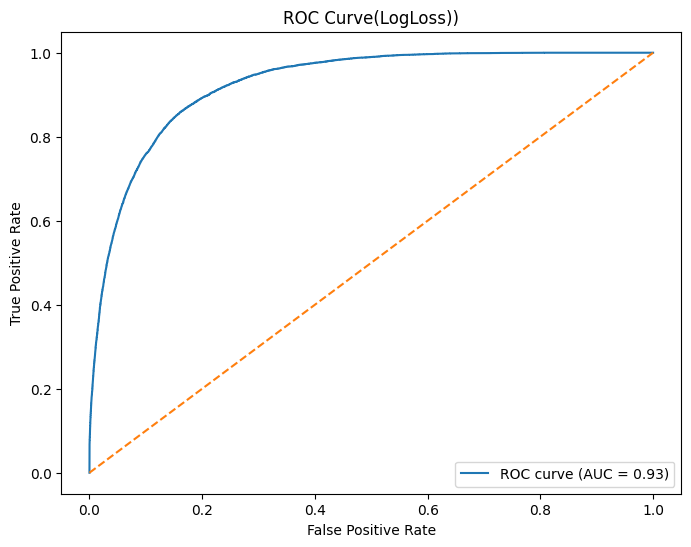

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(LogLoss))')
plt.legend(loc='lower right')
plt.show()

Criterion - CrossEntropy

In [ ]:
model = CatBoostClassifier(loss_function='CrossEntropy')
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:, 1]


0:	learn: 0.6577732	total: 94.5ms	remaining: 1m 34s
1:	learn: 0.6261974	total: 190ms	remaining: 1m 34s
2:	learn: 0.5979121	total: 282ms	remaining: 1m 33s
3:	learn: 0.5703847	total: 371ms	remaining: 1m 32s
4:	learn: 0.5436778	total: 460ms	remaining: 1m 31s
5:	learn: 0.5199909	total: 552ms	remaining: 1m 31s
6:	learn: 0.4996585	total: 669ms	remaining: 1m 34s
7:	learn: 0.4795790	total: 759ms	remaining: 1m 34s
8:	learn: 0.4625564	total: 854ms	remaining: 1m 34s
9:	learn: 0.4467549	total: 948ms	remaining: 1m 33s
10:	learn: 0.4313820	total: 1.04s	remaining: 1m 33s
11:	learn: 0.4183742	total: 1.13s	remaining: 1m 33s
12:	learn: 0.4052014	total: 1.23s	remaining: 1m 33s
13:	learn: 0.3940779	total: 1.31s	remaining: 1m 32s
14:	learn: 0.3835313	total: 1.41s	remaining: 1m 32s
15:	learn: 0.3734142	total: 1.5s	remaining: 1m 32s
16:	learn: 0.3645324	total: 1.59s	remaining: 1m 32s
17:	learn: 0.3557679	total: 1.7s	remaining: 1m 32s
18:	learn: 0.3485934	total: 1.79s	remaining: 1m 32s
19:	learn: 0.3418481	to

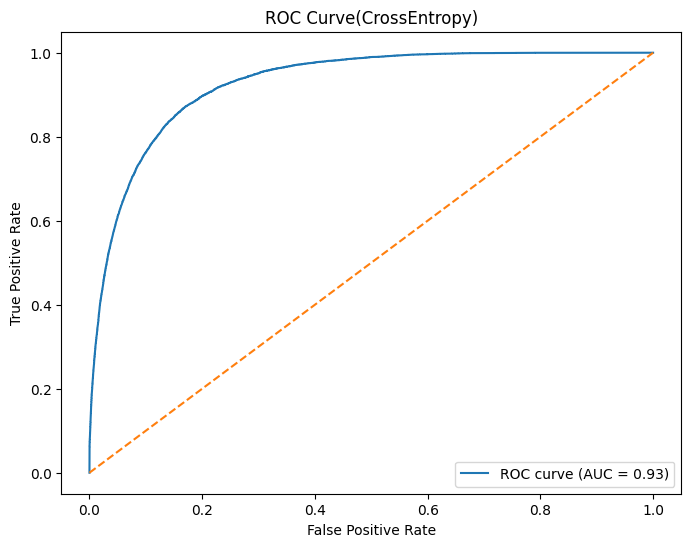

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(CrossEntropy)')
plt.legend(loc='lower right')
plt.show()

Criterion - MultiClass

In [ ]:
model = CatBoostClassifier(loss_function='MultiClass')
model.fit(X_train, y_train)

y_scores = model.predict_proba(X_test)[:, 1]

Learning rate set to 0.106494
0:	learn: 0.6262210	total: 291ms	remaining: 4m 50s
1:	learn: 0.5713729	total: 564ms	remaining: 4m 41s
2:	learn: 0.5265792	total: 744ms	remaining: 4m 7s
3:	learn: 0.4889748	total: 949ms	remaining: 3m 56s
4:	learn: 0.4566674	total: 1.12s	remaining: 3m 42s
5:	learn: 0.4289708	total: 1.31s	remaining: 3m 36s
6:	learn: 0.4055838	total: 1.49s	remaining: 3m 30s
7:	learn: 0.3855315	total: 1.67s	remaining: 3m 27s
8:	learn: 0.3686902	total: 1.85s	remaining: 3m 23s
9:	learn: 0.3532141	total: 2.04s	remaining: 3m 21s
10:	learn: 0.3404999	total: 2.21s	remaining: 3m 18s
11:	learn: 0.3288401	total: 2.38s	remaining: 3m 16s
12:	learn: 0.3185382	total: 2.56s	remaining: 3m 14s
13:	learn: 0.3094464	total: 2.73s	remaining: 3m 12s
14:	learn: 0.3014504	total: 2.9s	remaining: 3m 10s
15:	learn: 0.2943480	total: 3.08s	remaining: 3m 9s
16:	learn: 0.2880551	total: 3.26s	remaining: 3m 8s
17:	learn: 0.2827902	total: 3.41s	remaining: 3m 6s
18:	learn: 0.2777686	total: 3.61s	remaining: 3m 6

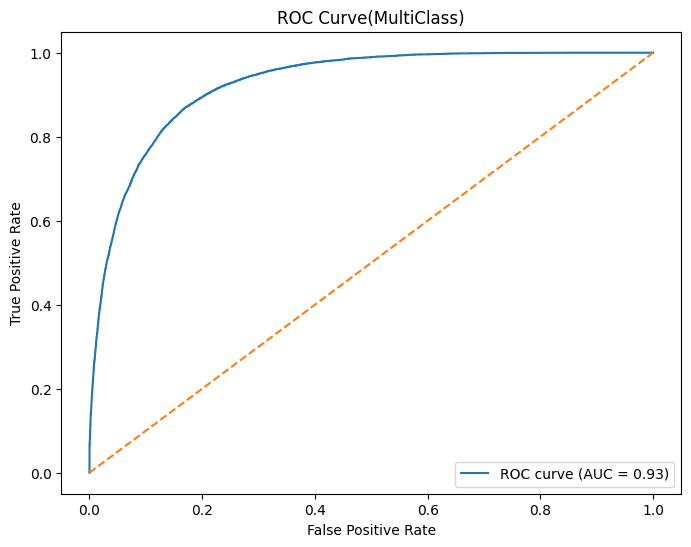

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve(MultiClass)')
plt.legend(loc='lower right')
plt.show()